# Final Project Submission

Please fill out:
* Student name: <b>Carly McMullen</b>
* Student pace: <b>Self paced</b>
* Scheduled project review date/time: <b>07 APR 2020/1000</b>
* Instructor name: <b>Jeff</b>
* Blog post URL:


## Import all programs I may need

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

## Previewing all the data given in the repo

In [2]:
rt_info=pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
print(len(rt_info))
rt_info.head()

1560


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [3]:
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding = "ISO-8859-1")
print(len(rt_reviews))
rt_reviews.head()


54432


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [4]:
bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
print(len(bom_movies))
bom_movies.head()

3387


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
imdb_names = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
print(len(imdb_names))
imdb_names.head()

606648


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [6]:
imbd_titles = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
print(len(imbd_titles))
imbd_titles.head()

331703


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [7]:
imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
print(len(imdb_crew))
imdb_crew.head()

146144


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [8]:
imdb_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
print(len(imdb_basics))
imdb_basics.head()

146144


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
imdb_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
print(len(imdb_principals))
imdb_principals.head()

1028186


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [10]:
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
print(len(imdb_ratings))
imdb_ratings.head()

73856


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
imdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
print(len(imdb_movies))
imdb_movies.head()

26517


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
print(len(tn_movie_budgets))
tn_movie_budgets.head()

5782


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Given the data above, what questions are both salient to the task and deliverable?</h6>
<ol>
    <li>What are the 100 films which had the highest profit margin?</li>
    <li>Of those films, what was the average production budget and does this correlate with profit?</li>
    <li>Of those films, what time of the year were they released and does this correlate with profit?</li>
    <li>Of those films, what genre were they and does this correlate with profit?</li>
    <li>Of those films, what was the average run time and does this correlate with profit?</li>
</ol>

## 1. What are the 100 films w/ the highest profit margin?

In [13]:
# Answering the first question. 
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [14]:
#convert columns to ints so they can be manipulated 
tn_movie_budgets['worldwide_gross']=tn_movie_budgets['worldwide_gross'].str.replace('$','').str.replace(',','').astype(int)
tn_movie_budgets['production_budget']=tn_movie_budgets['production_budget'].str.replace('$','').str.replace(',','').astype(int)

In [15]:
#Create a column for profit and order values by that. 
tn_movie_budgets['Profit']=tn_movie_budgets['worldwide_gross']-tn_movie_budgets['production_budget']
tn_movie_budgets['Profit']=tn_movie_budgets['Profit'].astype(int)
tn_movie_budgets=tn_movie_budgets.sort_values(by='Profit', ascending = False)
#Creat a new df called top_100 w/ just the info I want to use.
top_100=tn_movie_budgets.head(100)
top_100=top_100.set_index('movie').drop(['domestic_gross','id'], axis=1)
top_100.head()

,release_date,production_budget,worldwide_gross,Profit
movie,,,,
Avatar,"Dec 18, 2009",425000000,2776345279,2351345279
Titanic,"Dec 19, 1997",200000000,2208208395,2008208395
Avengers: Infinity War,"Apr 27, 2018",300000000,2048134200,1748134200
Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000,2053311220,1747311220
Jurassic World,"Jun 12, 2015",215000000,1648854864,1433854864


## 2. Of the top 100 films what is the average production budget and does it correlate with profit?

In [90]:
# creating a def to calculate correlation.
# there are two to handle the two main datasets created during this portion of the project 
def correlation(x,y):
    return pearsonr(top_100[x], top_100[y])[0]

def correlation_final(x,y):
    return pearsonr(top_100_final[x], top_100_final[y])[0]

In [91]:
#Find the average production budget and profit.
print('The mean profit is:',top_100['Profit'].mean())
print('The mean production budget is:', top_100['production_budget'].mean())
print('The mean worldwide gross is:', top_100['worldwide_gross'].mean())
print('The lowest production budget to make the Top 100 films is:',top_100['production_budget'].min())
R_profit_budget=correlation('Profit', 'production_budget')
print('The r value between profit and production budget is:', R_profit_budget)

The mean profit is: 850396016.54
The mean production budget is: 159522000.0
The mean worldwide gross is: 1009918016.54
The lowest production budget to make the Top 100 films is: 10500000
The r value between profit and production budget is: 0.3797822303349262


R: 0.3797822303349262


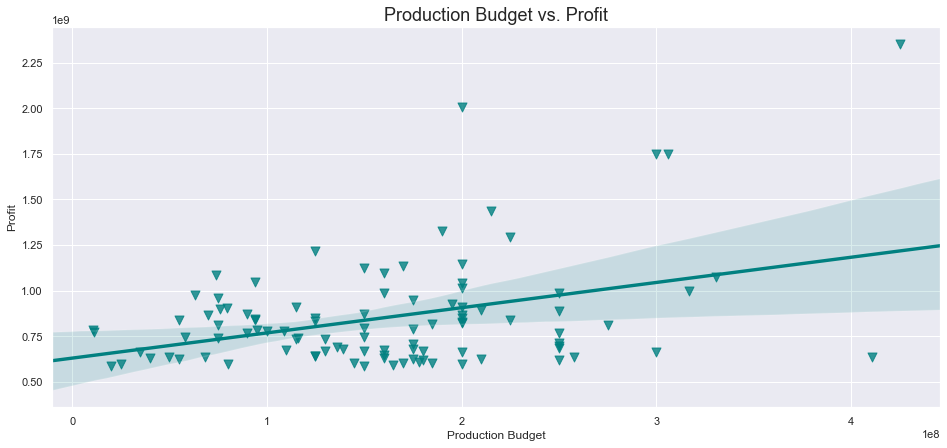

In [86]:
#Graphical representation of the relationship between Production Biudget and profitability 
Budget_Profit=plt.figure(figsize=(35,7))
ax=Budget_Profit.add_subplot(121)
sns.set_style('darkgrid')
sns.set_context('talk')
Profits = sns.regplot(x='production_budget', y='Profit', data=top_100, marker='v', color='teal', ax=ax).set(xlabel='Production Budget',
                                            ylabel='Profit', title='Production Budget vs. Profit')
print("R:", R_profit_budget)


### Conclusion: 
There is a positive correlation between production budget and profit. 

## 3. Of the top 100 films what time of year were they released and does this effect profit?

In [18]:
#turning the release_date to just the month for easier analysis 
type(top_100['release_date'])
top_100.head()
top_100['release_date'][1]    
Release_Month =[]
for x in range(0,100):
    Release_Month.append(top_100['release_date'][x][0:3])
Release_Month
top_100['Release_Month']=Release_Month
top_100.head()

,release_date,production_budget,worldwide_gross,Profit,Release_Month
movie,,,,,
Avatar,"Dec 18, 2009",425000000,2776345279,2351345279,Dec
Titanic,"Dec 19, 1997",200000000,2208208395,2008208395,Dec
Avengers: Infinity War,"Apr 27, 2018",300000000,2048134200,1748134200,Apr
Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000,2053311220,1747311220,Dec
Jurassic World,"Jun 12, 2015",215000000,1648854864,1433854864,Jun


In [178]:
#Finding average profit per month 
top_100[top_100['Release_Month']=='Dec']['Profit'].mean()
print(top_100[top_100['Release_Month']=='Sep']['Profit'].mean())  
top_100[top_100['Release_Month']=='Sep']
#checking that this method is working - it is! 
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Profit_By_Month=[]
for month in Months:
    Profit_By_Month.append(top_100[top_100['Release_Month']==month]['Profit'].mean())

Profit_By_Month
Profit_By_Month[0] = 0
int(Profit_By_Month[0])

662457969.0


0

In [188]:
# run a t-test
Release_Month_Profit_TTest=stats.ttest_1samp(Profit_By_Month, 0.0)
#create a small dataframe w/ just averages by month
d = {'Month':Months, 'Average_Profit':Profit_By_Month}
Profit_Per_Month = pd.DataFrame(d)
Profit_Per_Month.sort_values(by=['Average_Profit'], ascending=False)

,Month,Average_Profit
3,Apr,1.212389e+09
11,Dec,1.127411e+09
5,Jun,8.460514e+08
1,Feb,8.295419e+08
2,Mar,8.262676e+08
6,Jul,8.044878e+08
4,May,7.647546e+08
10,Nov,7.528756e+08
9,Oct,7.376286e+08
8,Sep,6.624580e+08


Ttest_1sampResult(statistic=8.942576230257453, pvalue=2.2315364657974504e-06)


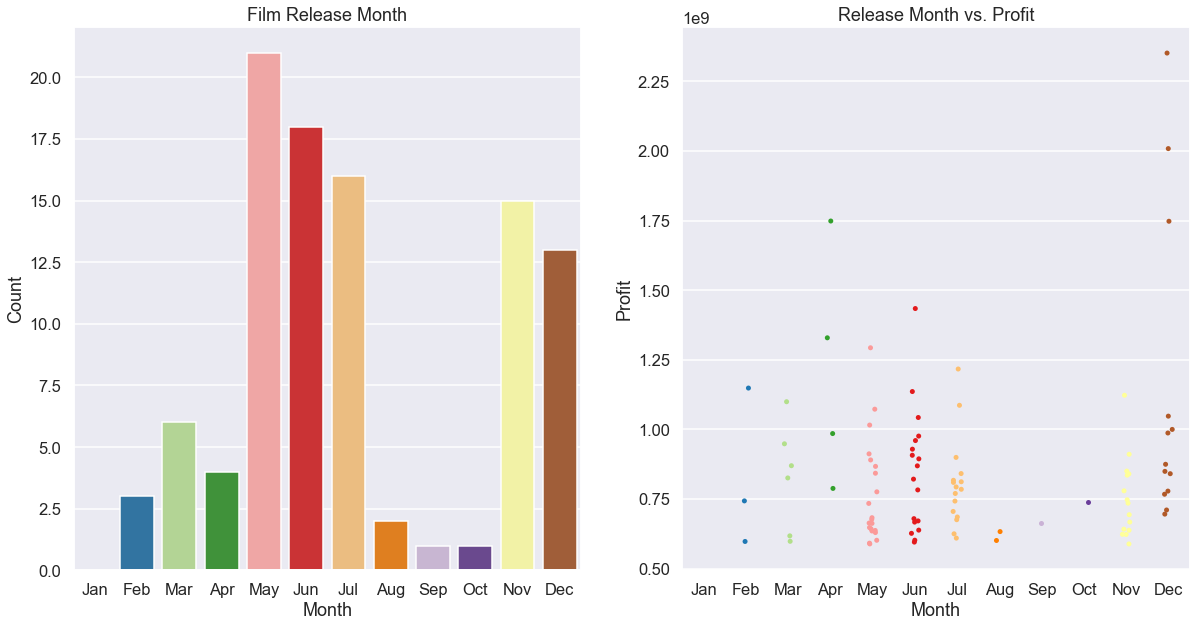

In [189]:
# graphical analysis of release_dates and it's relationship to profit 
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


sns.set_context('talk')
Release_Data = plt.figure(figsize=(20,10))

ax = Release_Data.add_subplot(121)
ax2 = Release_Data.add_subplot(122)
Color=sns.color_palette("Paired", n_colors=12)

sns.countplot(top_100['Release_Month'], order=Months, ax=ax, palette=Color).set(title='Film Release Month',
                                                                ylabel='Count', xlabel='Month')
sns.stripplot(x='Release_Month', y='Profit', data=top_100, order=Months, ax=ax2, palette=Color).set(title=
                                        'Release Month vs. Profit', ylabel='Profit', xlabel='Month')
print(Release_Month_Profit_TTest)

### Conclusion
<lo>
    <li>The most common time of year to release movies is the summer months (May/Jun/July) closely followed by the holiday months (Nov/Dec).</li> 
    <li>The highest average profit per month are as follows: April, December, June</li> 
    <li>The month you releaes a movie <b>DOES</b> statistically impact profit

## 4. Of the top 100 films, what genre were they and does this correlate with profit?

In [20]:
#Merge my top 100 Dataframe with another to get runtimes and genres
imdb_basics=imdb_basics.rename(columns={'primary_title':'movie'})
imdb_basics.head()
top_100_final=pd.merge(top_100,imdb_basics[['movie', 'runtime_minutes','genres']], on='movie', how='left')
print(len(top_100_final))
top_100_final

122


,movie,release_date,production_budget,worldwide_gross,Profit,Release_Month,runtime_minutes,genres
0,Avatar,"Dec 18, 2009",425000000,2776345279,2351345279,Dec,93.0,Horror
1,Titanic,"Dec 19, 1997",200000000,2208208395,2008208395,Dec,NaN,Adventure
2,Titanic,"Dec 19, 1997",200000000,2208208395,2008208395,Dec,115.0,Family
3,Avengers: Infinity War,"Apr 27, 2018",300000000,2048134200,1748134200,Apr,149.0,"Action,Adventure,Sci-Fi"
4,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000,2053311220,1747311220,Dec,NaN,NaN
...,...,...,...,...,...,...,...,...
117,Shrek Forever After,"May 21, 2010",165000000,756244673,591244673,May,93.0,"Adventure,Animation,Comedy"
118,The Matrix Reloaded,"May 15, 2003",150000000,738576929,588576929,May,NaN,NaN
119,Beauty and the Beast,"Nov 13, 1991",20000000,608431132,588431132,Nov,112.0,"Drama,Fantasy,Romance"
120,Beauty and the Beast,"Nov 13, 1991",20000000,608431132,588431132,Nov,129.0,"Family,Fantasy,Musical"


In [21]:
#I've noticed that there are 22 duplicates, let's fix that. 
top_100_final[top_100_final['movie'].duplicated(keep=False)].sort_values('movie')

,movie,release_date,production_budget,worldwide_gross,Profit,Release_Month,runtime_minutes,genres
47,Alice in Wonderland,"Mar 5, 2010",200000000,1025491110,825491110,Mar,48.0,Documentary
48,Alice in Wonderland,"Mar 5, 2010",200000000,1025491110,825491110,Mar,99.0,"Fantasy,Musical"
46,Alice in Wonderland,"Mar 5, 2010",200000000,1025491110,825491110,Mar,108.0,"Adventure,Family,Fantasy"
120,Beauty and the Beast,"Nov 13, 1991",20000000,608431132,588431132,Nov,129.0,"Family,Fantasy,Musical"
16,Beauty and the Beast,"Mar 17, 2017",160000000,1259199706,1099199706,Mar,60.0,"Family,Fantasy,Musical"
15,Beauty and the Beast,"Mar 17, 2017",160000000,1259199706,1099199706,Mar,129.0,"Family,Fantasy,Musical"
121,Beauty and the Beast,"Nov 13, 1991",20000000,608431132,588431132,Nov,60.0,"Family,Fantasy,Musical"
119,Beauty and the Beast,"Nov 13, 1991",20000000,608431132,588431132,Nov,112.0,"Drama,Fantasy,Romance"
14,Beauty and the Beast,"Mar 17, 2017",160000000,1259199706,1099199706,Mar,112.0,"Drama,Fantasy,Romance"
107,Coco,"Nov 22, 2017",175000000,798008101,623008101,Nov,98.0,Horror


In [22]:
#Dropping the duplicated rows which make the most sense
top_100_final=top_100_final.drop([47,48,120,121,16,14,107,105,12,11,8,82,83,76,77,78,79,54,1,67,87,88], axis=0)

In [23]:
#New list
print(len(top_100_final))
top_100_final.reset_index()
top_100_final.head()

100


,movie,release_date,production_budget,worldwide_gross,Profit,Release_Month,runtime_minutes,genres
0,Avatar,"Dec 18, 2009",425000000,2776345279,2351345279,Dec,93.0,Horror
2,Titanic,"Dec 19, 1997",200000000,2208208395,2008208395,Dec,115.0,Family
3,Avengers: Infinity War,"Apr 27, 2018",300000000,2048134200,1748134200,Apr,149.0,"Action,Adventure,Sci-Fi"
4,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000,2053311220,1747311220,Dec,NaN,NaN
5,Jurassic World,"Jun 12, 2015",215000000,1648854864,1433854864,Jun,124.0,"Action,Adventure,Sci-Fi"


In [24]:
#Is there missing info in the new list?
top_100_final.isna().any()
#Yes. 
print(len(top_100_final[top_100_final['runtime_minutes'].isna()]))
print(len(top_100_final[top_100_final['genres'].isna()]))
#Looks like just under half of the entries are missing runtime and genre info
#Something to pursue in the future. 

41
40


In [25]:
#For organization, reseting the index
top_100_final=top_100_final.reset_index()
top_100_final.head()

,index,movie,release_date,production_budget,worldwide_gross,Profit,Release_Month,runtime_minutes,genres
0,0,Avatar,"Dec 18, 2009",425000000,2776345279,2351345279,Dec,93.0,Horror
1,2,Titanic,"Dec 19, 1997",200000000,2208208395,2008208395,Dec,115.0,Family
2,3,Avengers: Infinity War,"Apr 27, 2018",300000000,2048134200,1748134200,Apr,149.0,"Action,Adventure,Sci-Fi"
3,4,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000,2053311220,1747311220,Dec,NaN,NaN
4,5,Jurassic World,"Jun 12, 2015",215000000,1648854864,1433854864,Jun,124.0,"Action,Adventure,Sci-Fi"


In [26]:
#drop "index column"
top_100_final.drop(columns=['index'])

,movie,release_date,production_budget,worldwide_gross,Profit,Release_Month,runtime_minutes,genres
0,Avatar,"Dec 18, 2009",425000000,2776345279,2351345279,Dec,93.0,Horror
1,Titanic,"Dec 19, 1997",200000000,2208208395,2008208395,Dec,115.0,Family
2,Avengers: Infinity War,"Apr 27, 2018",300000000,2048134200,1748134200,Apr,149.0,"Action,Adventure,Sci-Fi"
3,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000,2053311220,1747311220,Dec,NaN,NaN
4,Jurassic World,"Jun 12, 2015",215000000,1648854864,1433854864,Jun,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
95,The Passion of the Christ,"Feb 25, 2004",25000000,622341924,597341924,Feb,NaN,NaN
96,Spider-Man 2,"Jun 30, 2004",200000000,795110670,595110670,Jun,NaN,NaN
97,Shrek Forever After,"May 21, 2010",165000000,756244673,591244673,May,93.0,"Adventure,Animation,Comedy"
98,The Matrix Reloaded,"May 15, 2003",150000000,738576929,588576929,May,NaN,NaN


In [28]:
#Make the genres all a string for easier manipulation
top_100_final['genres']=top_100_final['genres'].map(lambda x: str(x))

In [29]:
#preview genre info
top_100_final.head()
top_100_final['genres'].value_counts()
#hmm, those don't look too good for graphing.

nan                              40
Action,Adventure,Sci-Fi          17
Adventure,Animation,Comedy       13
Action,Adventure,Comedy           5
Action,Adventure,Fantasy          4
Adventure,Family,Fantasy          3
Action,Crime,Thriller             2
Adventure,Fantasy                 2
Action,Thriller                   1
Adventure,Drama,Fantasy           1
Family                            1
Adventure,Drama,Family            1
Adventure,Animation,Drama         1
Action,Adventure,Thriller         1
Family,Fantasy,Musical            1
Action,Sci-Fi,Thriller            1
Biography,Documentary,History     1
Biography,Drama,Music             1
Drama,Fantasy,Romance             1
Action,Adventure,Animation        1
Horror,Thriller                   1
Horror                            1
Name: genres, dtype: int64

In [182]:
#Many of the genres are listed in an unreasonable way 
#Tedious work below of putting the genres in more reasonable bins for graphical analysis
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Horror','Sci-Fi'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Family','Romance'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Sci-Fi','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('nan','No Data'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Crime,Thriller','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Animation,Comedy', 'Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Family,Fantasy,Musical','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Animation','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Fantasy','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Crime,Thriller','Thriller'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Thriller','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Animation,Drama','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Animation,Comedy','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Comedy','Comedy'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Biography,Drama,Music','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Animation,Comedy','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Thriller','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Animation','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Drama,Family','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Family,Fantasy','Fantasy'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Comedy','Comedy'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Animation','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Sci-Fi,Thriller','Thriller'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Sci-Fi','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Fantasy','Fantasy'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Horror,Thriller','Horror'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Drama,Fantasy','Drama'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Fantasy','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Family,Fantasy','Fantasy'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Drama,Fantasy,Romance','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Romance,Fantasy,Musical','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Romance,Fantasy','Drama'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Biography,Documentary,History','Documentary'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Drama,Romance','Drama'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Sci-Fi,Thriller','Sci-Fi'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Animated/Romance','Animated/Family'))








In [183]:
#previewing info again
top_100_final['genres'].value_counts(dropna=False)
#ah, that's better.

No Data            40
Action             25
Animated/Family    18
Drama               5
Comedy              5
Fantasy             2
Sci-Fi              2
Thriller            1
Romance             1
Documentary         1
Name: genres, dtype: int64

In [184]:
#finding the average profit by genre
top_100_final[top_100_final['genres']=='Sci-Fi,Thriller']['Profit'].mean()
Genres = ['No Data', 'Action', 'Animated/Family', 'Drama', 'Comedy', 'Fantasy', 
             'Thriller', 'Romance', 'Sci-Fi', 'Documentary']
Profit_By_Genre=[]
for genre in Genres:
    Profit_By_Genre.append(top_100_final[top_100_final['genres']==genre]['Profit'].mean())

Profit_By_Genre

[765053899.925,
 946240420.84,
 844236248.1111112,
 728170981.2,
 712409976.6,
 702972238.0,
 737628605.0,
 2008208395.0,
 1506901624.0,
 679235992.0]

In [186]:
# run a t-test
Genre_Profit_TTest=stats.ttest_1samp(Profit_By_Genre, 0.0)
#create a small dataframe w/ just averages by month
g = {'Genre':Genres, 'Average_Profit':Profit_By_Genre}
Profit_Per_Month = pd.DataFrame(g)
Profit_Per_Month.sort_values(by=['Average_Profit'], ascending=False)

,Genre,Average_Profit
7,Romance,2.008208e+09
8,Sci-Fi,1.506902e+09
1,Action,9.462404e+08
2,Animated/Family,8.442362e+08
0,No Data,7.650539e+08
6,Thriller,7.376286e+08
3,Drama,7.281710e+08
4,Comedy,7.124100e+08
5,Fantasy,7.029722e+08
9,Documentary,6.792360e+08


Ttest_1sampResult(statistic=6.889633314021521, pvalue=7.149191025376455e-05)


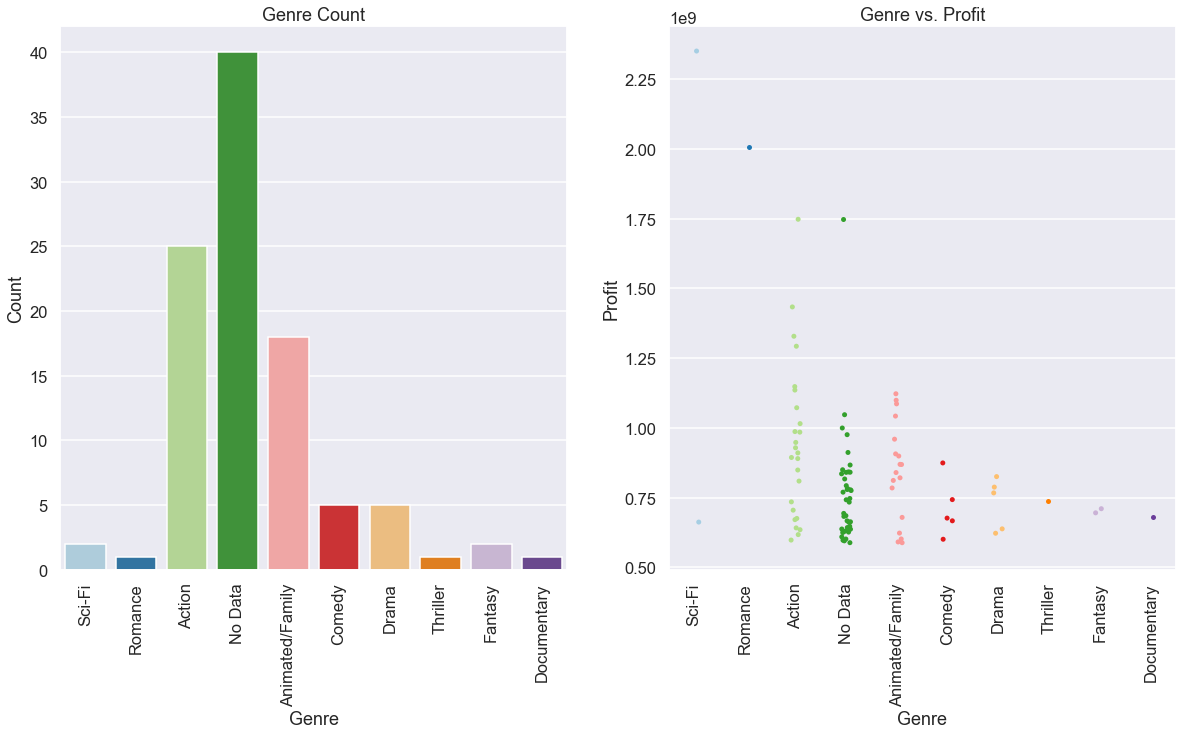

In [187]:
genre_data=plt.figure(figsize=(20,10))
sns.set_context('talk')
ax=genre_data.add_subplot(121)
ax2=genre_data.add_subplot(122)
Colors = sns.color_palette("Paired", n_colors=12)
sns.countplot(top_100_final['genres'], ax=ax, palette=Colors).set(title='Genre Count', xlabel='Genre', ylabel='Count')
sns.stripplot(x='genres', y='Profit', data=top_100_final, ax=ax2, palette=Colors).set(title='Genre vs. Profit',
                                                                xlabel='Genre', ylabel='Profit')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90);

print(Genre_Profit_TTest)

### Conclusions: 
<lo>
    <li> The most common film genres were No Data, Action, and Animated/Family</li>
    <li> The highest average profit film genres were Romance, Sci-Fi, Action</li>
    <li> The genre <b>DOES</b> statitically impact profit </li>

## 5. Of the top 100 films, what was the average run time and does this correlate with profit?   

In [210]:
#Deal with missing runtimes
top_100_final['runtime_minutes']=top_100_final['runtime_minutes'].fillna(value=top_100_final['runtime_minutes'].mean())
top_100_final.isna().sum()
#I decided to use the mean runtime to replace missing data

index                0
movie                0
release_date         0
production_budget    0
worldwide_gross      0
Profit               0
Release_Month        0
runtime_minutes      0
genres               0
dtype: int64

The r value between profit and runtime is: -0.03309665962297187
The average runtime is: 124.18644067796609


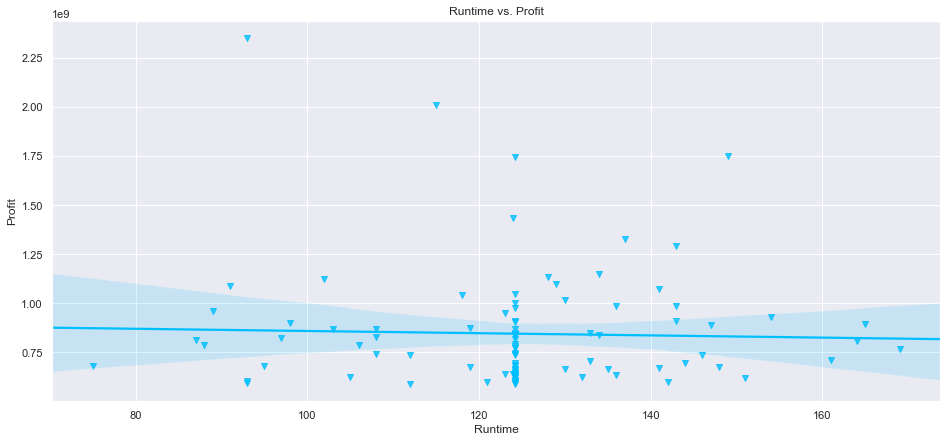

In [34]:
#Finding the relationship between runtime and profit. 
Runtime_Profit=plt.figure(figsize=(35,7))
sns.set_style('darkgrid')
sns.set_context('notebook')
ax = Runtime_Profit.add_subplot(121)
sns.regplot(x='runtime_minutes', y='Profit', data=top_100_final, marker='v', color='deepskyblue', ax=ax).set(xlabel='Runtime',
                                            ylabel='Profit', title='Runtime vs. Profit')
r2 = pearsonr(top_100_final['Profit'],top_100_final['runtime_minutes'])
R_profit_runtime=(r2[0])
print('The r value between profit and runtime is:', R_profit_runtime)
print('The average runtime is:', top_100_final['runtime_minutes'].mean())

### Conclusions: 
<lo>
    <li> The average runtime of the top 100 films is 2 hours 4 minute.</li>
    <li> There was not a slightly negative correlation between runtime and profit, however this correlation was not strong. </li>
    <li> The missing runtimes played a significant role in the statistical analysis of runtime and it's relationship to profit</li>

## What about online streaming platforms?

The intention of this project was to analyze the film industry for information to help Microsoft get into the online movie streaming biz, but all the info provided thus far has been in-theater-release films. The following is a short analysis of all of the original films Netflix has released for furhter and more specific data inline with Microsoft's goals. 

### Webscraping info about Netflix original films/documentaries 

In [35]:
#Wikipedia isn't always the most trusted source but this 
#page had a succinct lists of exactly the info I was looking for.
Netflix = requests.get('https://en.wikipedia.org/wiki/List_of_original_films_distributed_by_Netflix','lxml')
Netflix_Soup = BeautifulSoup(Netflix.content, 'html.parser')

In [271]:
#Check out the html
Netflix_Soup.prettify;

### Parsing and extracting desired data

In [273]:
#Parsing out just the movie titles
Titles=Netflix_Soup.findAll('i')
Titles[2].text

'Crouching Tiger, Hidden Dragon: Sword of Destiny'

In [274]:
#Putting all the movie titles in a list
Movie_Titles = [i.text for i in Netflix_Soup.findAll('i')]
Movie_Titles[:5]
Movie_Titles;

In [275]:
#Breaking the Titles into the correct sections (leaving out Upcoming releases, etc.)
Feature_Title = []
for movie in Movie_Titles:
    Feature_Title.append(movie)
    if movie == 'The App':
        break
     
        
print(len(Feature_Title))

203


In [276]:
#Finding all documentary titles 
Documentaries = Netflix_Soup.find('table', id='documentaryfeaturefilms')
Documentaries.find('i').text

'Art of Conflict: The Murals of Northern Ireland'

In [278]:
#Putting all the doc titles in a list
Documentary_Titles = [i.text for i in Documentaries.findAll('i')]
print(len(Documentary_Titles))
Documentary_Titles;

121


In [279]:
#Compiling both movie and documentary titles
Feature_Title = Feature_Title + Documentary_Titles

In [280]:
#Parsing out movie genres 
Genres = Netflix_Soup.findAll('tr')
Genres[1].select("td")[1].text.replace('\n','')

'War/drama'

In [281]:
#Putting movie genress in a list
Feature_Genre = []
for x in Genres[1:202]:
    Feature_Genre.append(x.select('td')[1].text.replace('\n',''))
Feature_Genre;

In [282]:
#Parsing out movie lengths
Movie_Length = Netflix_Soup.findAll('tr')
Movie_Length[2].select("td")[3].text.replace('.\n','')

'1 hour, 59 min'

In [283]:
#Placing film lengths in a list
Feature_Length = []
for x in Movie_Length[1:204]:
    Feature_Length.append(x.select('td')[3].text.replace('\n',''))
print(len(Feature_Length))
Feature_Length;

203


In [284]:
#parsing documentary lengths
Documentaries = Netflix_Soup.find('table', id='documentaryfeaturefilms')
Documentaries = Documentaries.findAll('tr')
Documentaries[1].select('td')[2].text.replace('.\n','')

'1 hour, 13 min'

In [286]:
#placing documentary lengths in a lists
Documentary_Length = []
for x in Documentaries[1:122]:
    Documentary_Length.append(x.select('td')[2].text.replace('.\n',''))
print(len(Documentary_Length))
Documentary_Length;


121


In [287]:
#Compiling movie and doc lengths into a list
Feature_Length = Feature_Length + Documentary_Length

In [288]:
#extracting release dates of movies
Movie_Release = Netflix_Soup.findAll('tr')
Movie_Release[1].select("td")[2].text.replace('\n','')

Release_Date = []
for x in Movie_Release[1:204]:
    Release_Date.append(x.select('td')[2].text.replace('\n',''))
Release_Date;

In [289]:
#extracting release date of documentaries
Documentary_Release = Netflix_Soup.find('table', id='documentaryfeaturefilms')
Documentary_Release = Documentary_Release.findAll('tr')
Documentary_Release[1].select('td')[1].text.replace('\n','')

Documentary_Premier = []
for x in Documentary_Release[1:122]:
    Documentary_Premier.append(x.select('td')[1].text.replace('\n',''))

Documentary_Premier;

In [194]:
#Compiling releases dates into a list
Release_Date= Release_Date + Documentary_Premier

In [222]:
#Putting all information together
Netflix_Originals = pd.DataFrame([Feature_Title, Feature_Genre, Feature_Length, Release_Date]).transpose()
Netflix_Originals.columns=['Title', 'Genre', 'Feature_Length','Release_Date']
Netflix_Originals.set_index('Title')
Netflix_Originals.head(20)

,Title,Genre,Feature_Length,Release_Date
0,Beasts of No Nation,War/drama,"2 hours, 16 min.","October 16, 2015"
1,The Ridiculous 6,Western,"1 hour, 59 min.","December 11, 2015"
2,"Crouching Tiger, Hidden Dragon: Sword of Destiny",Action,"1 hour, 43 min.","February 26, 2016"
3,Pee-wee's Big Holiday,Adventure,"1 hour, 29 min.","March 18, 2016"
4,Special Correspondents,Satire,"1 hour, 40 min.","April 29, 2016"
5,The Do-Over,Action comedy,"1 hour, 48 min.","May 27, 2016"
6,The Fundamentals of Caring,Comedy-drama,"1 hour, 37 min.","June 24, 2016"
7,Brahman Naman,Comedy,"1 hour, 35 min.","July 7, 2016"
8,Rebirth,Thriller,"1 hour, 40 min.","July 15, 2016"
9,Tallulah,Comedy-drama,"1 hour, 51 min.","July 29, 2016"


## Dealing with missing data

In [223]:
#finding missing data
Netflix_Originals.isna().sum()

Title               0
Genre             123
Feature_Length      0
Release_Date        0
dtype: int64

In [224]:
#The missing genre data is all the documentaries, filling this in
Netflix_Originals['Genre']=Netflix_Originals['Genre'].fillna('Documentary')

In [225]:
#Re-check
Netflix_Originals.isna().sum()
#Ah, that's what I like to see.

Title             0
Genre             0
Feature_Length    0
Release_Date      0
dtype: int64

In [226]:
#sanity check, and checking against wiki page.
print(Netflix_Originals.head())
print(Netflix_Originals.tail())
#it's all correct.

                                              Title      Genre  \
0                               Beasts of No Nation  War/drama   
1                                  The Ridiculous 6    Western   
2  Crouching Tiger, Hidden Dragon: Sword of Destiny     Action   
3                             Pee-wee's Big Holiday  Adventure   
4                            Special Correspondents     Satire   

     Feature_Length       Release_Date  
0  2 hours, 16 min.   October 16, 2015  
1   1 hour, 59 min.  December 11, 2015  
2   1 hour, 43 min.  February 26, 2016  
3   1 hour, 29 min.     March 18, 2016  
4   1 hour, 40 min.     April 29, 2016  
                             Title        Genre  Feature_Length  \
319   Bikram: Yogi, Guru, Predator  Documentary  1 hour, 26 min   
320     Lorena, Light-Footed Woman  Documentary          28 min   
321  The Irishman: In Conversation  Documentary          23 min   
322                 After the Raid  Documentary          25 min   
323        El Pepe: A 

## Questions: How does Netflix data compare to the Top 100 Films data?


### Feature Length

In [227]:
#Feature_Length. Must first convert the stirng to an int. 
Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(lambda x: x.replace('1 hour','60'))
Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(lambda x: x.replace('2 hours', '120'))
Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(lambda x: x.replace('3 hours', '180'))
Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(lambda x: x.replace('min.', ''))
Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(lambda x: x.replace('min', ''))
Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].to_numpy()
#Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(lambda x: x.astype(int))
Netflix_Originals.head()

,Title,Genre,Feature_Length,Release_Date
0,Beasts of No Nation,War/drama,"120, 16","October 16, 2015"
1,The Ridiculous 6,Western,"60, 59","December 11, 2015"
2,"Crouching Tiger, Hidden Dragon: Sword of Destiny",Action,"60, 43","February 26, 2016"
3,Pee-wee's Big Holiday,Adventure,"60, 29","March 18, 2016"
4,Special Correspondents,Satire,"60, 40","April 29, 2016"


In [228]:
#did it work?
int(Netflix_Originals.loc[0,'Feature_Length'].split(',')[0])+int(Netflix_Originals.loc[0,'Feature_Length'].split(',')[1])
#yes

136

In [229]:
# convert all to ints and sum
def movie_add(x):
    if len(x.split(','))==2:
        return int(x.split(',')[0])+int(x.split(',')[1])
    elif len(x.split(','))==1:
         return int(x)  
movie_add(Netflix_Originals.loc[322,'Feature_Length'])


Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(movie_add)

In [339]:
#Sanity check 
Netflix_Originals.head();
#Comparative Statistics 
print('The mean film length for the top 100 films is', top_100_final['runtime_minutes'].mean(),'minutes.')
print('The mean film length for the Netflix original films is', Netflix_Originals['Feature_Length'].mean(),
     'minutes.')

The mean film length for the top 100 films is 124.18644067796609 minutes.
The mean film length for the Netflix original films is 92.90123456790124 minutes.


#### Conclusion: The mean length of the Netflix film is 32 minutes shorter than the mean length of the top 100 films. 

### Release Date

In [231]:
#Release Date configuration
Netflix_Originals['Release_Month']=Netflix_Originals['Release_Date'].map(lambda x: x[0:3])
Netflix_Originals.head()
top_100_final.head()

,index,movie,release_date,production_budget,worldwide_gross,Profit,Release_Month,runtime_minutes,genres
0,0,Avatar,"Dec 18, 2009",425000000,2776345279,2351345279,Dec,93.000000,Sci-Fi
1,2,Titanic,"Dec 19, 1997",200000000,2208208395,2008208395,Dec,115.000000,Romance
2,3,Avengers: Infinity War,"Apr 27, 2018",300000000,2048134200,1748134200,Apr,149.000000,Action
3,4,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000,2053311220,1747311220,Dec,124.186441,No Data
4,5,Jurassic World,"Jun 12, 2015",215000000,1648854864,1433854864,Jun,124.000000,Action


In [312]:
#previewing the value counts between each
print(Netflix_Originals['Release_Month'].value_counts(normalize=True))
print(top_100_final['Release_Month'].value_counts(normalize=True))

Oct    0.141975
Sep    0.114198
Nov    0.111111
May    0.092593
Apr    0.083333
Mar    0.077160
Dec    0.077160
Aug    0.067901
Jun    0.061728
Jan    0.058642
Jul    0.058642
Feb    0.055556
Name: Release_Month, dtype: float64
May    0.21
Jun    0.19
Nov    0.15
Jul    0.15
Dec    0.13
Mar    0.06
Apr    0.04
Feb    0.03
Aug    0.02
Sep    0.01
Oct    0.01
Name: Release_Month, dtype: float64


In [313]:
#attempting to make lists to make a dataframe that could creat the graph I want
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Netflix_Value_Counts=[0.05, 0.05, 0.07, 0.08, 0.09, 0.06, 0.05, 0.06, 0.11, 0.14, 0.11, 0.07]
Top_100_Value_Counts=[0.0, 0.03, 0.06, 0.04, 0.21, 0.19, 0.15, 0.02, 0.01, 0.01, 0.15, 0.13]

In [331]:
percentile_list = pd.DataFrame(np.column_stack([Months, Netflix_Value_Counts, Top_100_Value_Counts]), 
                               columns=['Months', 'Netflix', 'Top 100'])
percentile_list.set_index('Months')

,Netflix,Top 100
Months,,
Jan,0.05,0.0
Feb,0.05,0.03
Mar,0.07,0.06
Apr,0.08,0.04
May,0.09,0.21
Jun,0.06,0.19
Jul,0.05,0.15
Aug,0.06,0.02
Sep,0.11,0.01


In [341]:
#Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             #'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#new_figure = plt.figure(figsize=(20,8))

#ax = new_figure.add_subplot(121)
#color=sns.color_palette("GnBu_d")
#sns.barplot(x='Months', y='Netflix', data=percentile_list, ax=ax, palette=color).set(title='Release Date Comparisons')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Netflix Film Release Month')]

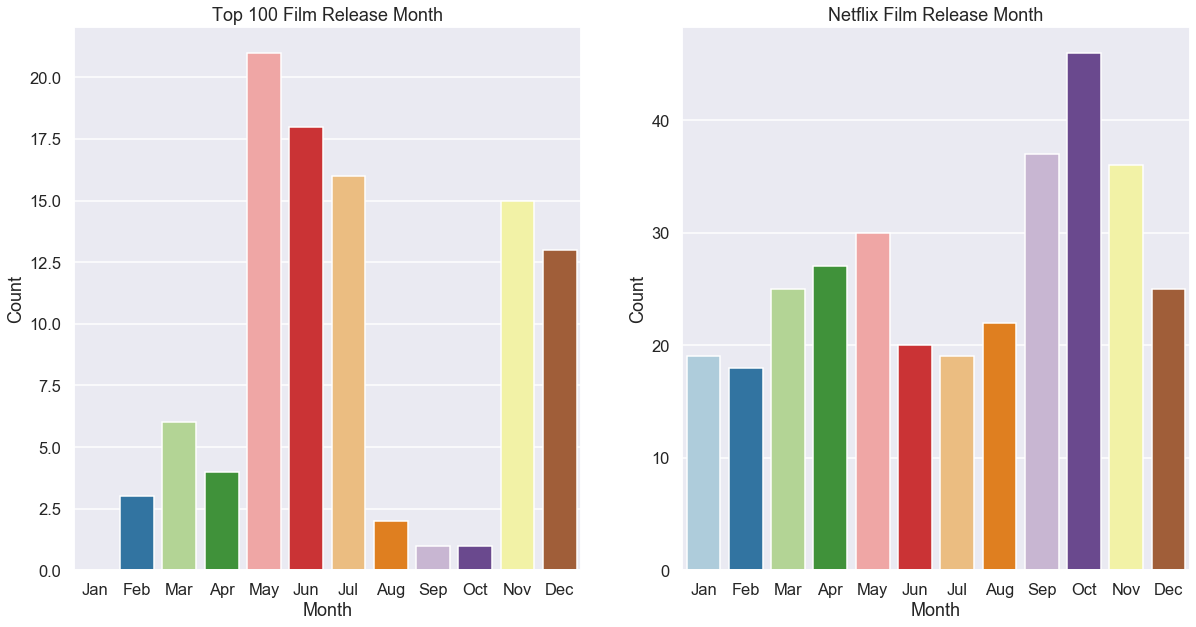

In [352]:
#visual representation of the counts of each
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.set_context('talk')
Release_Data = plt.figure(figsize=(20,10))

ax = Release_Data.add_subplot(121)
ax2 = Release_Data.add_subplot(122)
Color=sns.color_palette("Paired", n_colors=12)

sns.countplot(top_100['Release_Month'], order=Months, ax=ax, palette=Color).set(title='Top 100 Film Release Month',
                                                                ylabel='Count', xlabel='Month')
sns.countplot(Netflix_Originals['Release_Month'], order=Months, ax=ax2, palette=Color).set(title='Netflix Film Release Month',
                                                                ylabel='Count', xlabel='Month')


#### Conclusion: The most common release months for the Netflix original films were October, September, and November while the top 100 films were most commonly released in May, June, and November.

### Genre

In [345]:
#preview value counts between the two 
print(Netflix_Originals['Genre'].value_counts(normalize=True))
print(top_100_final['genres'].value_counts(normalize=True))

Documentary              0.379630
Drama                    0.098765
Comedy                   0.086420
Romantic comedy          0.067901
Thriller                 0.037037
                           ...   
Horror/crime drama       0.003086
War-Comedy               0.003086
Heist film               0.003086
Romantic comedy-drama    0.003086
Drama/Horror             0.003086
Name: Genre, Length: 66, dtype: float64
No Data            0.40
Action             0.25
Animated/Family    0.18
Drama              0.05
Comedy             0.05
Fantasy            0.02
Sci-Fi             0.02
Thriller           0.01
Romance            0.01
Documentary        0.01
Name: genres, dtype: float64
66


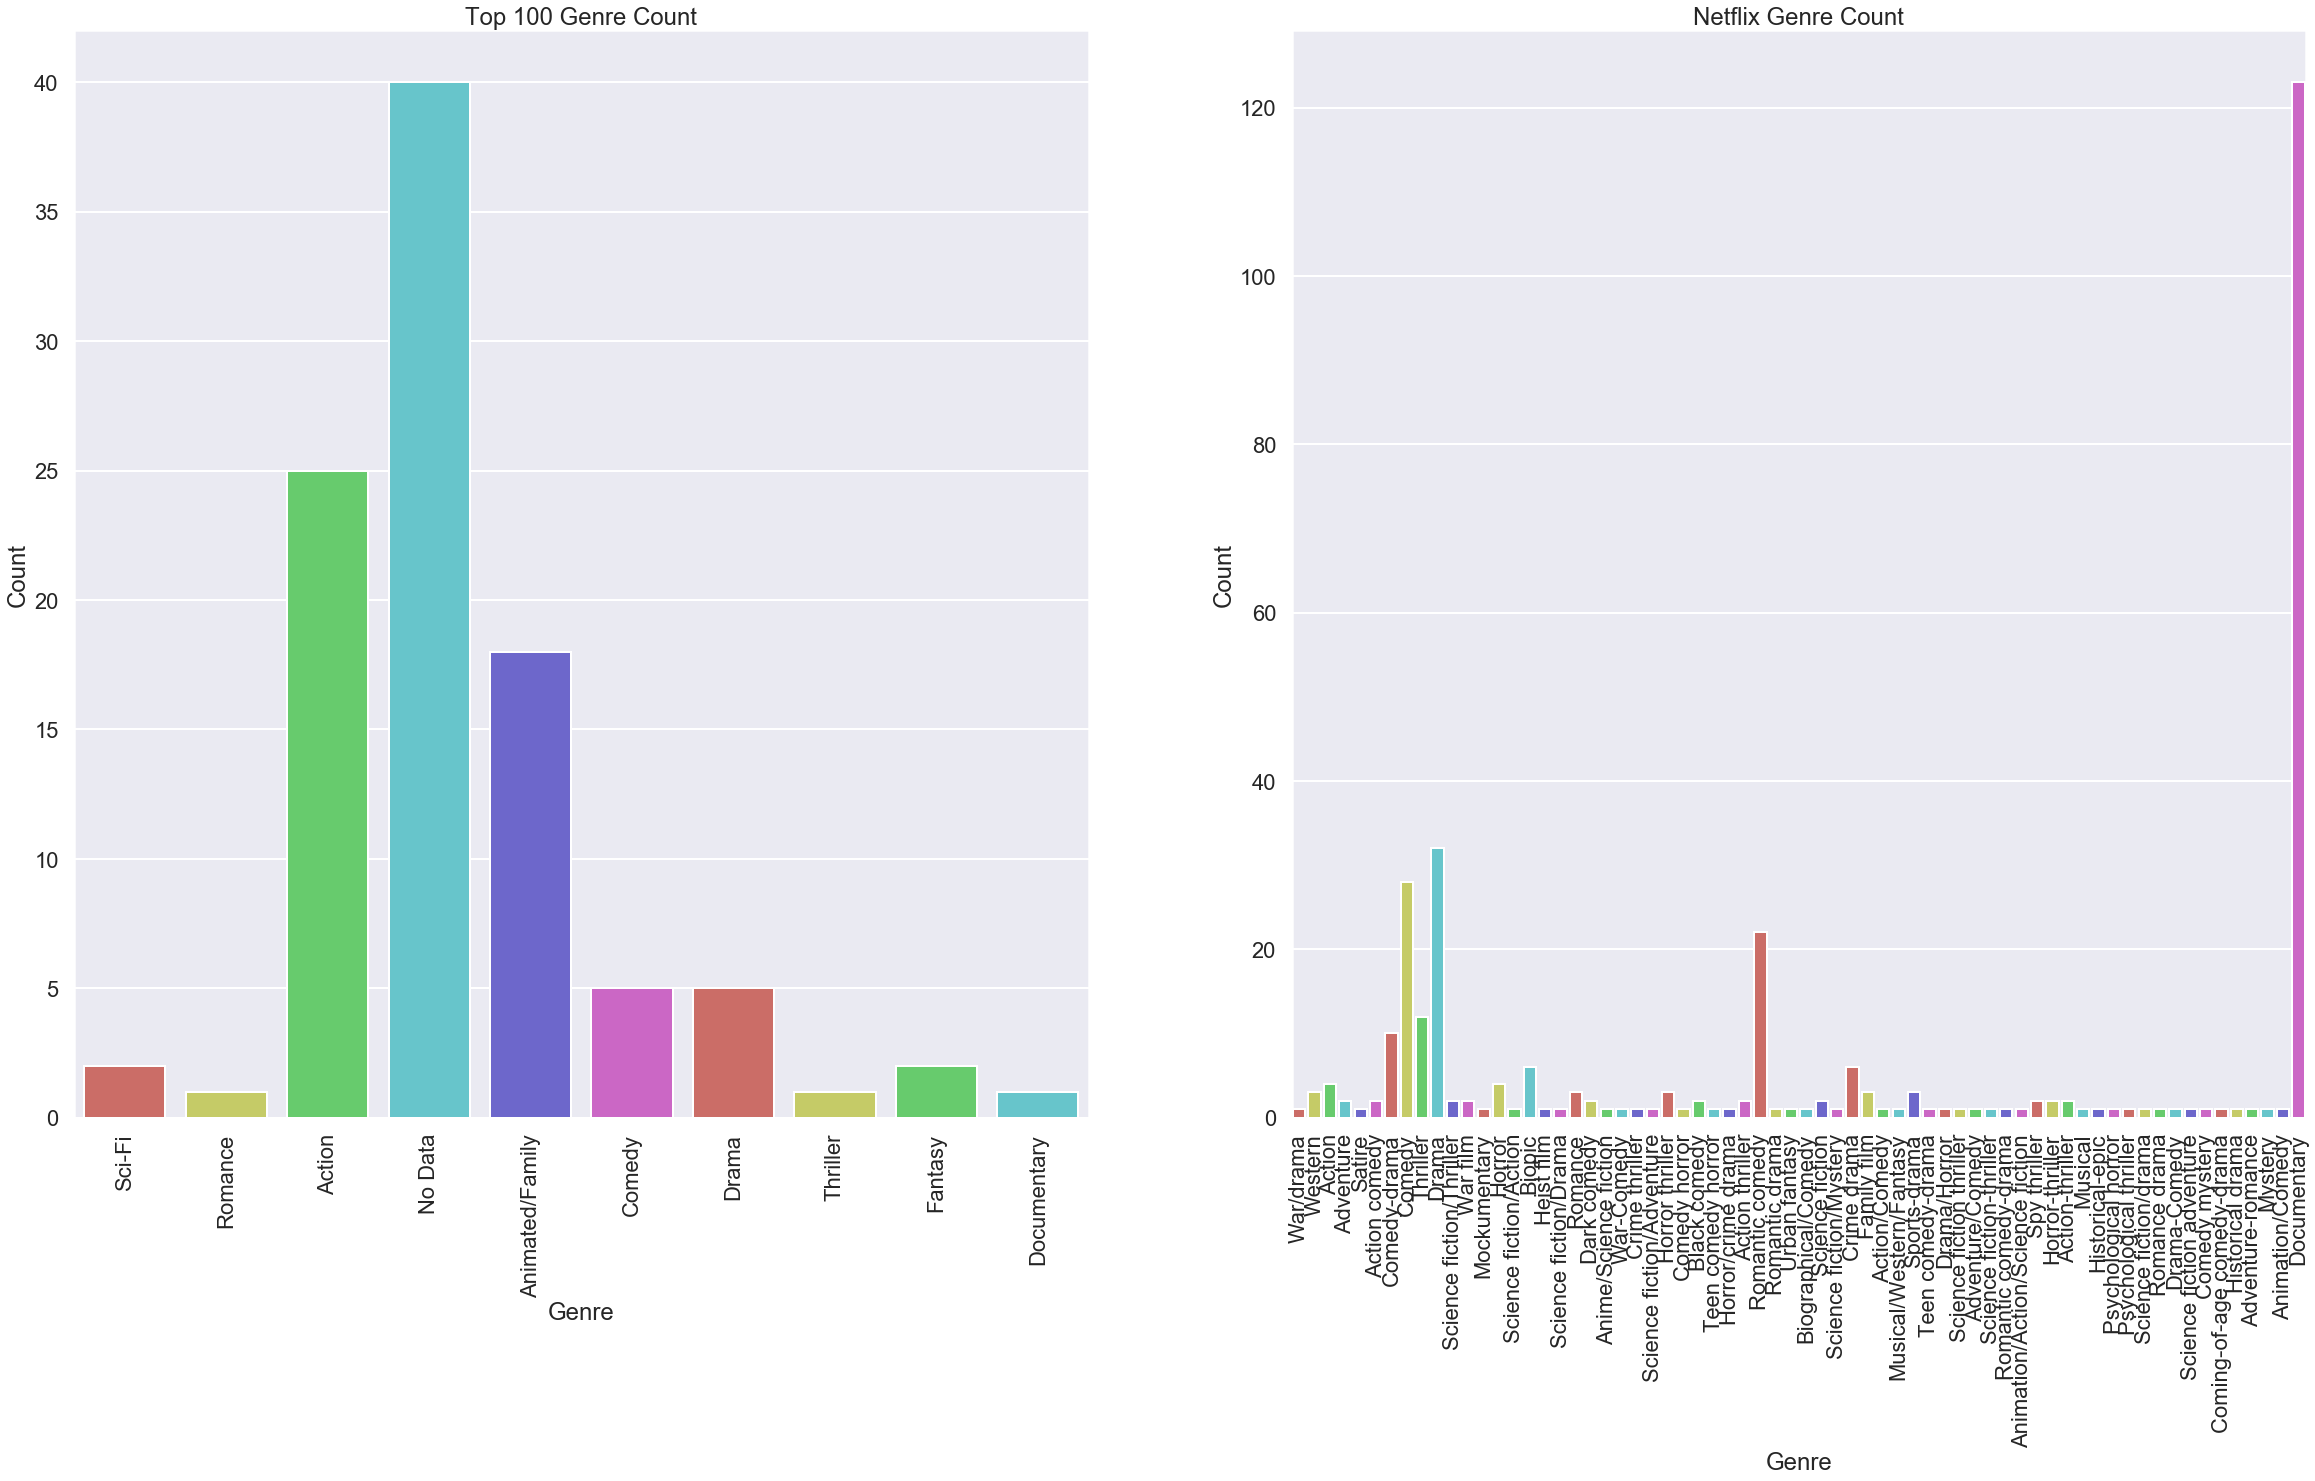

In [356]:
# graphical representation
genre_data=plt.figure(figsize=(40,20))
sns.set_context('poster')
ax=genre_data.add_subplot(121)
ax2=genre_data.add_subplot(122)
Colors = sns.color_palette("hls")
sns.countplot(top_100_final['genres'], ax=ax, palette=Colors).set(title='Top 100 Genre Count', xlabel='Genre', ylabel='Count')
sns.countplot(Netflix_Originals['Genre'], ax=ax2, palette=Colors).set(title='Netflix Genre Count', xlabel='Genre', ylabel='Count')

ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90);

#### Conclusion: The three most common genres in the Netflix original films were Documentary, Drama, and Comedy while the most common genress for the top 100 films were No data, action, and animated/family. 